In [7]:
import numpy as np
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import theano.tensor as tt
from astropy import units as u
from astropy.constants import M_earth, M_sun

from simulate_data import *

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

    - orbit_params = orbital parameters for each planet arranged as a list of lists:
        - period = period in days
        - ecc = eccentricity 
        - t_periastron = The epoch of a reference periastron passage in days.
        - omega = argument of periapsis in radans
        - Omega = longitude of ascending node  
        - incl = inclination in radians
        - m_planet = mass of planet in Earth masses 

In [5]:
# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

P_earth = 365.256 
e_earth = 0.0167
Tper_earth= 2454115.5208333
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(45.0)
m_earth = 1 / 3.00273e-6 #in solar masses



P_jup = 4327.631
e_jup = 0.0484
Tper_jup = 2455633.7215278
omega_jup = np.radians(274.3)
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.304) + inclination_earth
m_jup = 317.83 / 3.00273e-6 #in solar masses


P_nep = 59758.97 
e_nep = 0.00859
Tper_nep = 2468662.5000000
omega_nep = np.radians(273.2)
Omega_nep = np.radians(131.784)
inclination_nep = np.radians(1.7700) + inclination_earth
m_nep = 17.204 #units m_earth5.9724



P_saturn = 10739.58 
e_saturn = 0.0539
Tper_saturn = 2452832.0625000
omega_saturn = np.radians(338.9)
Omega_saturn = np.radians(113.7)
inclination_saturn = np.radians(2.486) + inclination_earth
m_saturn = 95.159 #units m_earth




/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:291: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


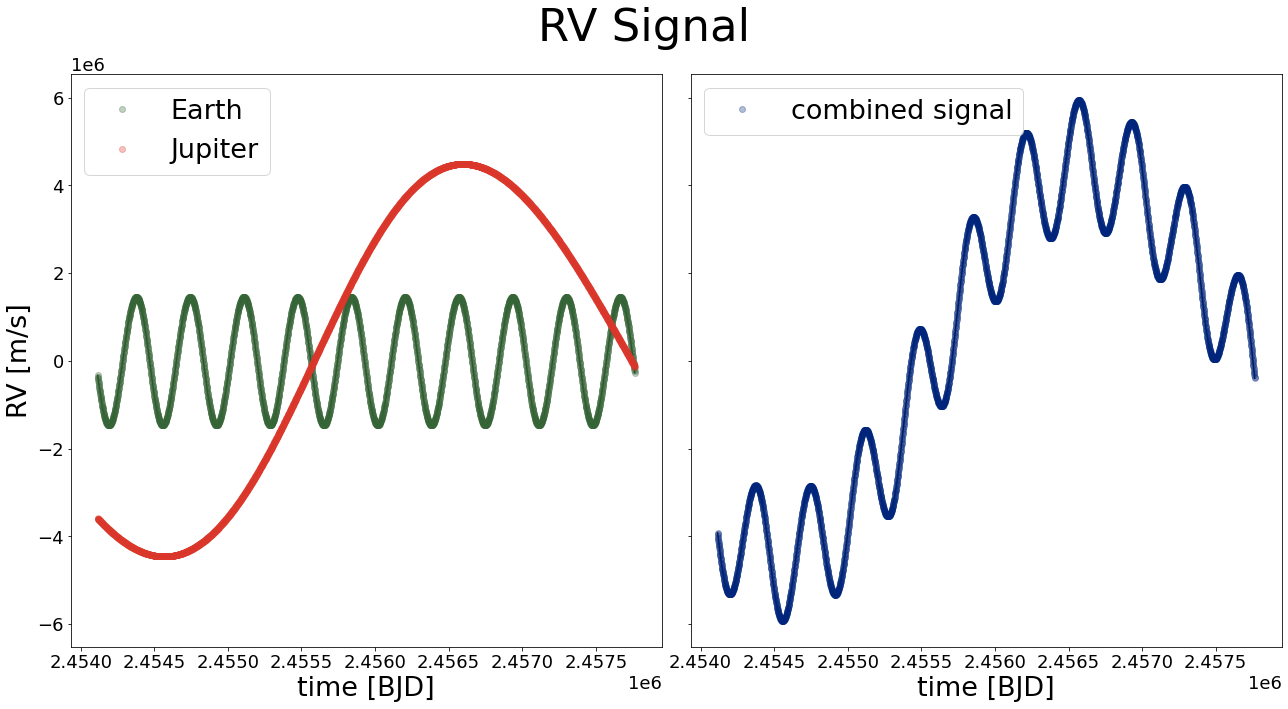

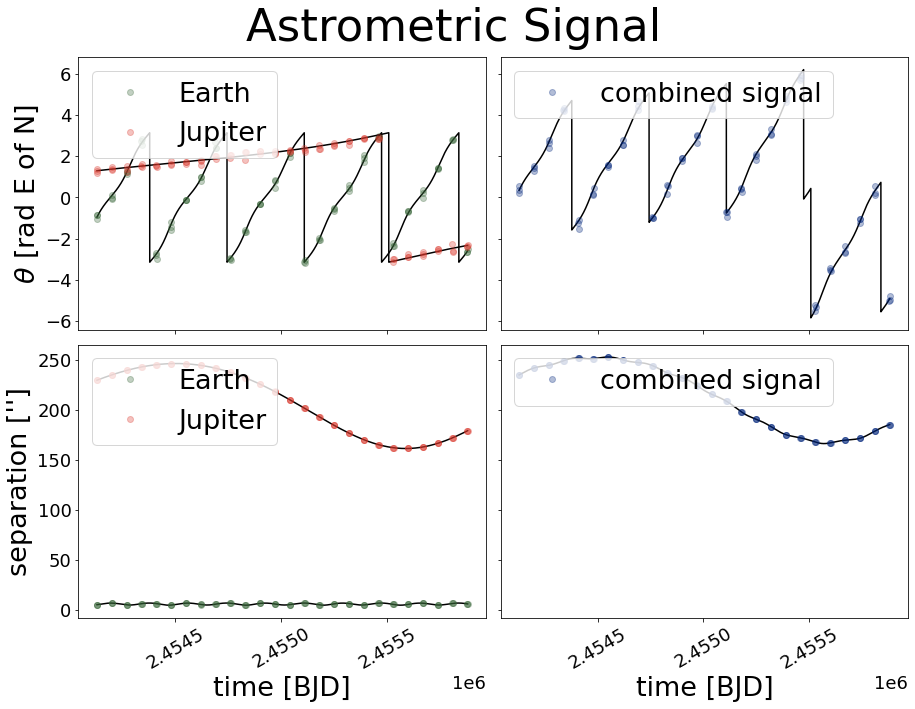

In [6]:
orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]
orbit_params_saturn = [P_saturn, e_saturn, Tper_saturn, omega_saturn, Omega_saturn, inclination_saturn, m_saturn]
orbit_params_nep = [P_nep, e_nep, Tper_nep, omega_nep, Omega_nep, inclination_nep, m_nep]


orbit_params = [orbit_params_earth, orbit_params_jup]

times_observed_astrometry = []
t_0 = int(Tper_earth)
for ii in range(t_0, t_0+1825):
    if ii % 70 == 0:
        times_observed_astrometry.append(ii-1)
        times_observed_astrometry.append(ii)
        times_observed_astrometry.append(ii+1)

n_planets = len(orbit_params)
t_dur_rv = 3650
n_obs_rv = 3000
sigma_rv = 0.01

sigma_theta = 0.1
sigma_rho = 0.001
plx = 0.1


simulate_and_plot(
    n_planets, 
    sigma_rv, 
    sigma_theta,
    sigma_rho,
    plx,
    orbit_params,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'],
    t_dur_rv = t_dur_rv,
    n_obs_rv = n_obs_rv,
    times_observed_astrometry = times_observed_astrometry
    )



/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:291: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


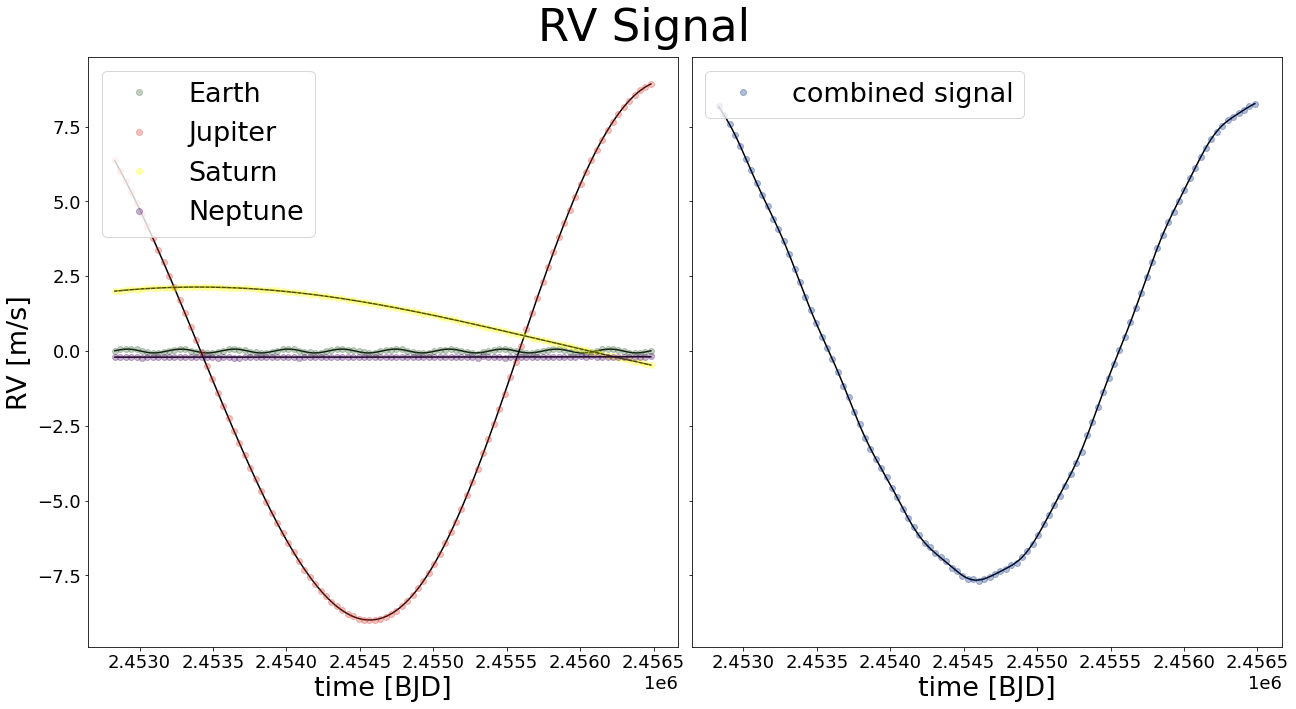

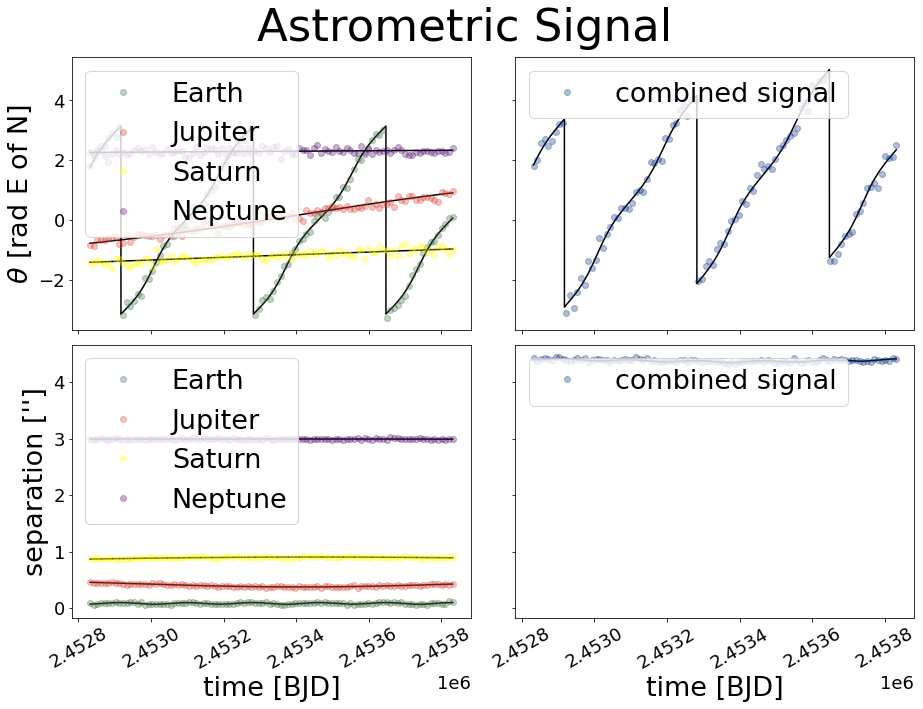

In [23]:
orbit_params_all = [orbit_params_earth, orbit_params_jup, orbit_params_saturn, orbit_params_nep]



n_planets = 4
t_dur_rv = 3650
n_obs_rv = 100
sigma_rv = 0.01
t_dur_astrometry = 1000
n_obs_astrometry = 100
sigma_theta = 0.1
sigma_rho = 0.01
plx = 0.1



simulate_and_plot(
    n_planets,  
    sigma_rv,  
    sigma_theta,
    sigma_rho,
    plx,
    orbit_params_all,
    ['#366537', '#db372b', 'yellow', '#480564', '#00257c'],
    ['Earth', 'Jupiter', 'Saturn', 'Neptune'],
    t_dur_rv = t_dur_rv, 
    n_obs_rv = n_obs_rv,
    t_dur_astrometry = t_dur_astrometry, 
    n_obs_astrometry = n_obs_astrometry,)

/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:291: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:468: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/Danielyahalomi/Documents/Columbia/Research/RomanAstrometry/Code/simulate_data.py:415: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


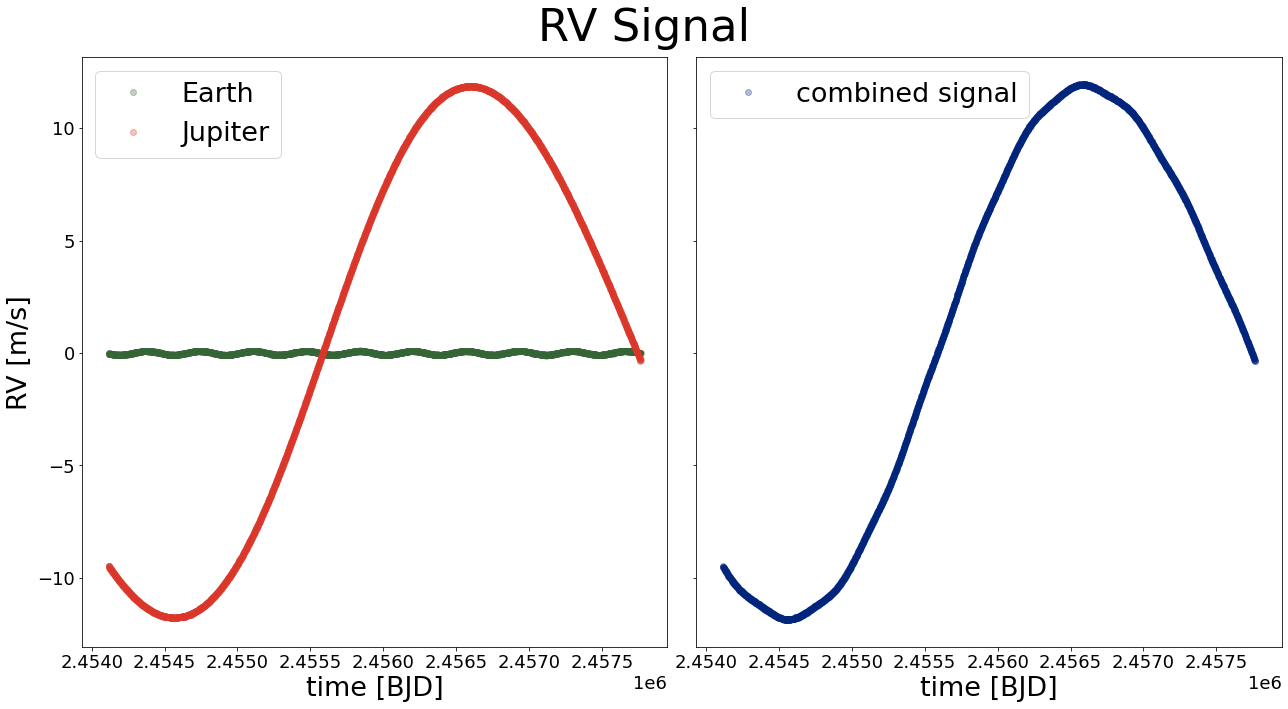

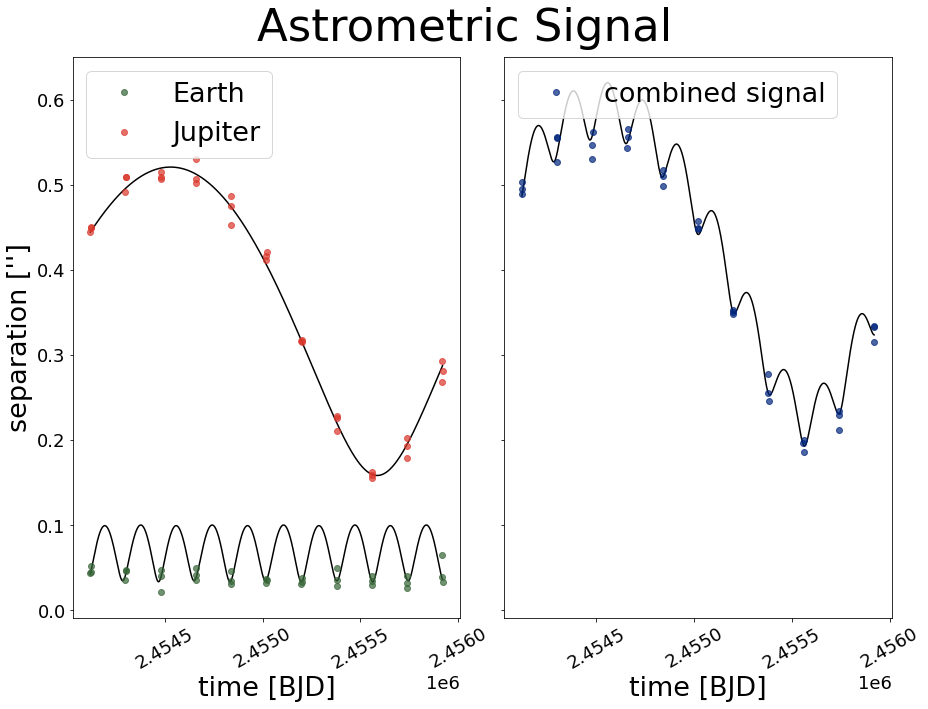

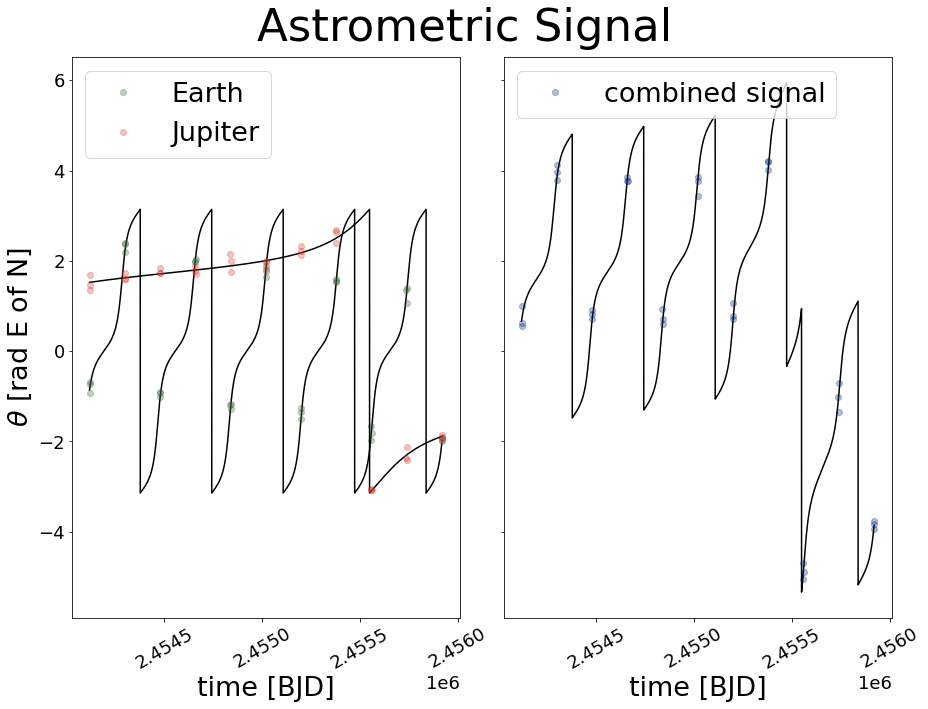

In [5]:
colors = ['#366537', '#db372b', '#00257c']
planet_names = ['Earth', 'Jupiter']
orbit_params = [orbit_params_earth, orbit_params_jup]

times_observed_astrometry = []
t_0 = int(2454115.5208333)
for ii in range(t_0, t_0+1825):
    if ii % 180 == 0:
        times_observed_astrometry.append(ii-1)
        times_observed_astrometry.append(ii)
        times_observed_astrometry.append(ii+1)

n_planets = 2
t_dur_rv = 3650
n_obs_rv = 3000
sigma_rv = 0.01
sigma_theta = 0.1
sigma_rho = 0.01
plx = 0.1



simulate_results = simulate_data(
    n_planets,  
    sigma_rv, 
    sigma_theta,
    sigma_rho,
    plx,
    orbit_params,
    t_dur_rv = t_dur_rv,
    n_obs_rv = n_obs_rv,
    times_observed_astrometry = times_observed_astrometry)
    
    
[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
 [rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
 [theta_orbit, theta_orbit_sum, theta_sim, theta_sim_sum],
 [rho_orbit, rho_orbit_sum, rho_sim, rho_sim_sum]]  = simulate_results
    
    
plot_rv_signal(
    n_planets, 
    rv_orbit, 
    rv_orbit_sum, 
    rv_sim, 
    rv_sim_sum, 
    times_rv, 
    times_observed_rv,
    colors,
    planet_names)
        
        
    
plot_astrometry_separation(
    n_planets, 
    theta_orbit, 
    theta_orbit_sum, 
    theta_sim, 
    theta_sim_sum, 
    rho_orbit, 
    rho_orbit_sum, 
    rho_sim, 
    rho_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    colors,
    planet_names)


plot_astrometry_position_angle(
    n_planets, 
    theta_orbit, 
    theta_orbit_sum, 
    theta_sim, 
    theta_sim_sum, 
    rho_orbit, 
    rho_orbit_sum, 
    rho_sim, 
    rho_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    colors,
    planet_names)